****************************************************************************************
****************************************************************************************
    Year               Champion               Runner-Up
0   2022  Golden State Warriors          Boston Celtics
1   2021        Milwaukee Bucks            Phoenix Suns
2   2020     Los Angeles Lakers              Miami Heat
3   2019        Toronto Raptors   Golden State Warriors
4   2018  Golden State Warriors     Cleveland Cavaliers
5   2017  Golden State Warriors     Cleveland Cavaliers
6   2016    Cleveland Cavaliers   Golden State Warriors
7   2015  Golden State Warriors     Cleveland Cavaliers
8   2014      San Antonio Spurs              Miami Heat
9   2013             Miami Heat       San Antonio Spurs
10  2012             Miami Heat   Oklahoma City Thunder
11  2011       Dallas Mavericks              Miami Heat
12  2010     Los Angeles Lakers          Boston Celtics
13  2009     Los Angeles Lakers       

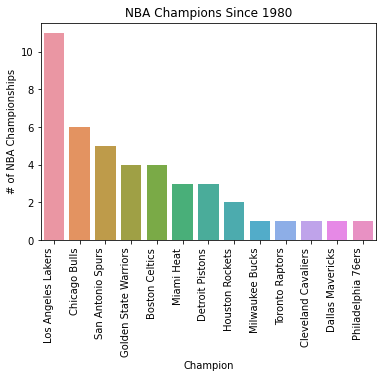

****************************************************************************************
****************************************************************************************
There are 4544 rows and 8 columns in player_data.csv
****************************************************************************************
****************************************************************************************
               name  year_start  year_end position  height  weight  \
4494  Muggsy Bogues        1988      2001        G  05-Mar     136   
4495    Penny Early        1969      1969        G  05-Mar     114   
4498   Earl Boykins        1999      2012        G  05-May     135   
4543      Spud Webb        1986      1998        G  05-Jun     133   
4542     Mel Hirsch        1947      1947        G  05-Jun     165   

           birth_date                          college  inches  
4494  January 9, 1965           Wake Forest University      63  
4495     May 30, 1943                   

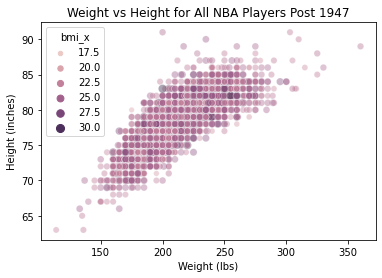

****************************************************************************************
****************************************************************************************


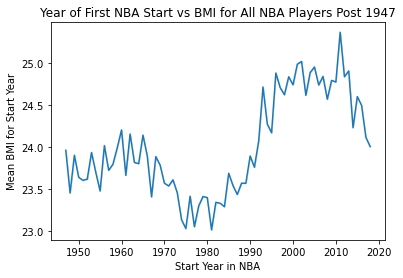

****************************************************************************************
****************************************************************************************


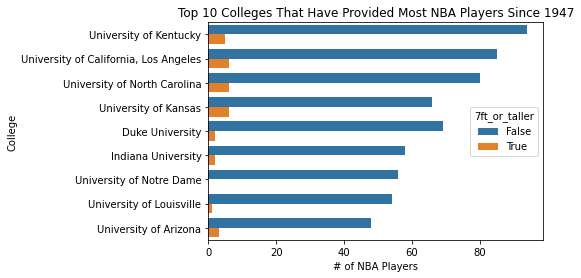

In [1]:
# Required libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import plotly.express as px
import seaborn as sns


# Project Requirement 1 - Data. The project should be real-world dataset and include reference to the source in the report
# Project Requirement 2 - Importing. Retrieve data online using SQL, APIs, or web scraping
# Basketball URL to be scraped
url = "https://www.basketball-reference.com/playoffs/"

# Collect the HTML data
html = urlopen(url)
        
# Create Beautiful Soup object from HTML
soup = BeautifulSoup(html, features="lxml")

# Use getText()to extract the headers into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]

# Get rows from table
rows = soup.findAll('tr')[2:]
rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

# Remove empty rows from the web scrape
rows_data.pop(20)
rows_data.pop(40)


# Project Requirement 3 - Preparation. Indexing
# Look at all NBA champions data back to 1980
rows_data = rows_data[0:43]


# Project Requirement 4 - Analysis. Looping
# Add a column for years into rows_data
last_year = 2022
for i in range(0, len(rows_data)):
       rows_data[i].insert(0, last_year)
       last_year -=1

    
# Project Requirement 3 - Preparation. Create pandas DataFrame
nba_finals = pd.DataFrame(rows_data, columns = headers)

# Print only the Year, Champion & Runner Up
print("****************************************************************************************")
print("****************************************************************************************")
print(nba_finals[['Year','Champion', 'Runner-Up']])

# Extract the Year, Champion & Runner Up information from the dataframe
nba_top2 = nba_finals[['Year','Champion', 'Runner-Up']]

# Export full dataframe to a CSV 
nba_finals.to_csv("nba_finals_history.csv", index=False)

# Export dataframe of Finalists to a CSV 
nba_top2.to_csv("nba_winners_runners-up.csv", index=False)


# Project Requirement 3 - Preparation. Drop Duplicates
# Project Requirement 4 - Analysis. Looping
champions_list = nba_finals['Champion']
temp = []
 
for x in champions_list:
    if x not in temp:
        temp.append(x)
 
champions_list = temp
print("****************************************************************************************")
print("****************************************************************************************") 
print(f'The full list of teams that have won an NBA championship going back to 1980 = {temp}')

# Project Requirement 4 - Analysis. Use NumPy functions
print("****************************************************************************************")
print("****************************************************************************************")
print("The number of different NBA teams that have won a championship since 1980 is:", len(np.unique(champions_list)))


# Project Requirement 3 - Preparation. Sorting, grouping.
# Project Requirement 4 - Analysis. Groupby.
# Project Requirement 4 - Analysis. Use NumPy functions.
print("****************************************************************************************")
print("****************************************************************************************")
print("Number of NBA Championships Won Since 1980")
print(nba_finals.groupby('Champion')['Champion'].count().sort_values(ascending=False))

# Project Requirement 5 - Visualisation - Generate at least 2 charts using Matplotlib or Seaborn
print("****************************************************************************************")
print("****************************************************************************************")
fig, ax = plt.subplots()
sns.countplot(x=nba_finals['Champion'], order = nba_finals['Champion'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_title("NBA Champions Since 1980")
ax.set_xlabel("Champion")
ax.set_ylabel("# of NBA Championships")
plt.show()
fig.savefig("NBA_Champions_Since_1980.png")


# Project Requirement 1 - Data. The project should be real-world dataset and include reference to the source in the report

# NBA player data taken from the following location in Kaggle:
# https://www.kaggle.com/code/johndkearns/starter-nba-players-stats-since-1950-d424e5b4-0/data?select=player_data.csv
# player_data.csv file saved from this location

# Project Requirement 2 - Importing. Import data from a flat file (.csv, .xls, .xlsx, .txt, etc.)
player_data = pd.read_csv("player_data.csv", delimiter=',')
player_data.dataframeName = "player_data.csv"
nRow, nCol = player_data.shape
print("****************************************************************************************")
print("****************************************************************************************")
print(f"There are {nRow} rows and {nCol} columns in player_data.csv")
#print(player_data)


# Project Requirement 3 - Preparation. Replace Missing Values.
player_data.college = player_data.college.fillna("No Uni Info")

# Height information in player_data.csv is not in useable format
# Import a csv file that will convert height in '5ft 11 inches' format to inches
inches_data = pd.read_csv("Height_in_inches.csv", delimiter=',')
inches_data.dataframeName = "Height_in_inches.csv"

# Project Requirement 3 - Preparation. Merge DataFrames
merged_data = player_data.merge(inches_data, on = 'height', validate = 'many_to_one')

# Project Requirement 3 - Preparation. Sorting.
# Sort players in ascending height
sorted_height = merged_data.sort_values('inches')
print("****************************************************************************************")
print("****************************************************************************************")
print(sorted_height.head())

# Project Requirement 4 - Analysis. Define a custom function to create reusable code
# Custom function calculates the Body Mass Index (BMI) for each player
def bmi(merged_data):
    bmi_calc = merged_data['weight'] * 703 / merged_data['inches'] ** 2
    return round(bmi_calc,2)

# Add BMI information into DataFrame
merged_data['bmi'] = merged_data.apply(bmi, axis=1)

# Calculated the mean BMI per year for each start year of player data
bmi_average = merged_data.groupby('year_start')['bmi'].mean()

# Add mean BMI per year information into DataFrame
merged_data_bmi = merged_data.merge(bmi_average, on = 'year_start', validate = 'many_to_one')

# Add logic to DataFrame to identify players taller than 7 ft (84 inches)
merged_data_bmi['7ft_or_taller'] = np.where(merged_data_bmi['inches']>= 84, True, False)

# Find the unique values of the "college" column
colleges = merged_data_bmi['college'].unique()

# Print out the unique values of the "college" column
print("****************************************************************************************")
print("****************************************************************************************")
print("The total number of colleges that NBA players were drafted from since 1947 is:", len(set(colleges)))


# Project Requirement 4 - Analysis. Dictionary or Lists
# Iterating over the list for a selected college and printing the mode values for selected options. 
print("****************************************************************************************")
print("****************************************************************************************")
k=1; 
for i in merged_data.loc[merged_data.college == 'University of Notre Dame', 'weight'].mode():
    print(f"The #{k} mode value for weight of University of Notre Dame players is {i} lbs")
    k=k+1

    
# Project Requirement 5 - Visualisation - Generate at least 2 charts using Matplotlib or Seaborn
# Scatter plot of Weight vs Height for all players with BMI used as hue for plot
print("****************************************************************************************")
print("****************************************************************************************")
fig, ax = plt.subplots()
sns.scatterplot(x=merged_data['weight'], y=merged_data['inches'], 
                hue = merged_data_bmi['bmi_x'],
                size = merged_data_bmi['bmi_x'],
                alpha = 0.4) 
ax.set_title("Weight vs Height for All NBA Players Post 1947")
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Height (inches)")
plt.show()
fig.savefig("Weight vs Height.png", dpi=300)

# Project Requirement 5 - Visualisation - Generate at least 2 charts using Matplotlib or Seaborn
# Line plot of year of first NBA start vs mean BMI for players that started NBA careers in that year
print("****************************************************************************************")
print("****************************************************************************************")
fig, ax = plt.subplots()
sns.lineplot(x=merged_data_bmi['year_start'], y=merged_data_bmi['bmi_y'])
ax.set_title("Year of First NBA Start vs BMI for All NBA Players Post 1947")
ax.set_xlabel("Start Year in NBA")
ax.set_ylabel("Mean BMI for Start Year")
plt.show()
fig.savefig("BMI vs Start Year.png", dpi=300)

# Project Requirement 5 - Visualisation - Generate at least 2 charts using Matplotlib or Seaborn
# Visualisation of the top 10 colleges that have provided players to the NBA
# iloc = 0 is excluded as this is for players that did not have an associated college
# Colleges that have provided players over 7 ft tall are also made visible in this chart
print("****************************************************************************************")
print("****************************************************************************************")
fig, ax = plt.subplots()
sns.countplot(y=merged_data_bmi['college'], hue = merged_data_bmi['7ft_or_taller'], order=merged_data_bmi.college.value_counts().iloc[1:10].index)
ax.set_title("Top 10 Colleges That Have Provided Most NBA Players Since 1947")
ax.set_xlabel("# of NBA Players")
ax.set_ylabel("College")
plt.show()
fig.savefig("Top 10 Colleges.png", dpi=300)



